In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import mpld3
import random as rn

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})

### Generate data


In [2]:
N=100
mu = 0
sigma = 1

np.random.seed(2)
rn.seed(2)

y=np.empty(0)
X=np.empty([0,6])
for i in range(N):
    Z1= rn.normalvariate(mu,sigma)
    Z2= rn.normalvariate(mu,sigma)
    y = np.append(y, 3*Z1-1.5*Z2+2*rn.normalvariate(mu,sigma))
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.normal(mu, sigma,6)/5
    X = np.vstack ((X, Xarr.tolist()))


### Visualize data

/home/edvard/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/edvard/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


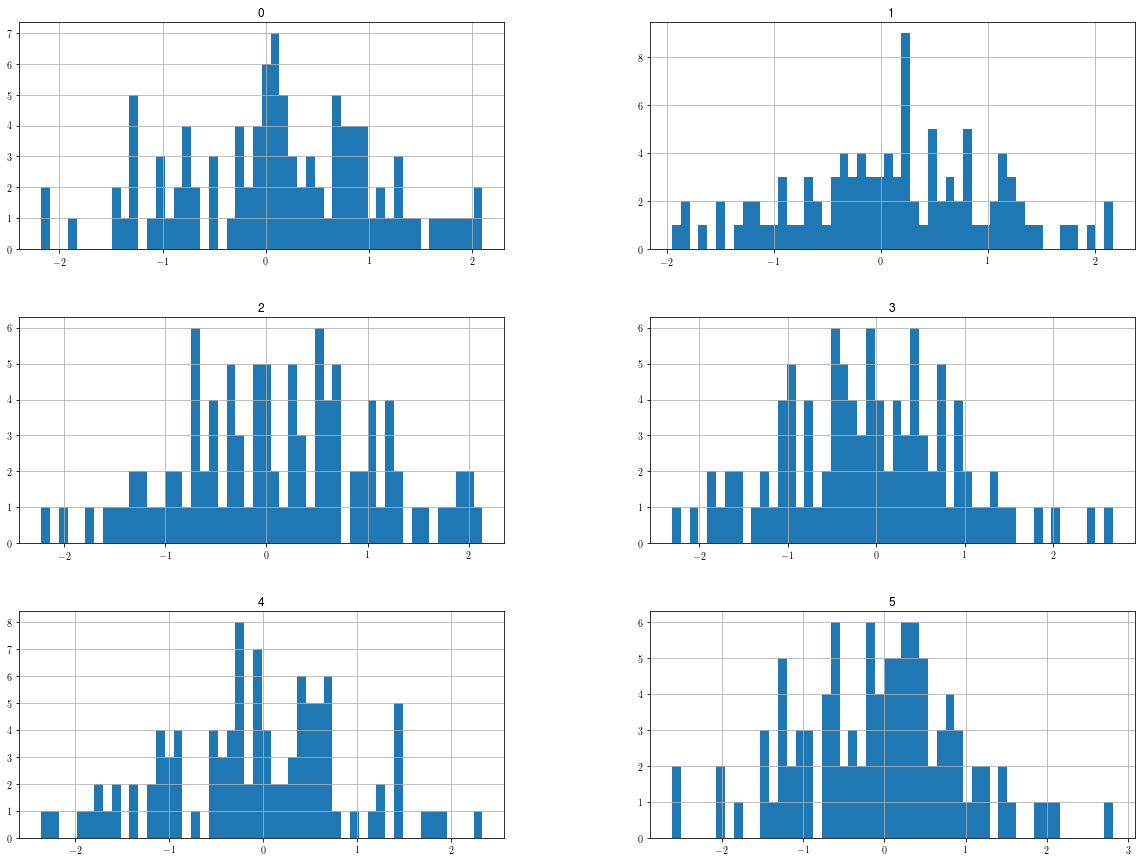

In [3]:
%matplotlib inline

import pandas as pd
df = pd.DataFrame (X)
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Correlation

In [4]:
corr_matrix = df.corr()
corr_matrix

,0,1,2,3,4,5
0,1.000000,0.950391,0.961979,0.085139,0.059342,0.115387
1,0.950391,1.000000,0.955097,0.088392,0.067101,0.112110
2,0.961979,0.955097,1.000000,0.090158,0.074502,0.120196
3,0.085139,0.088392,0.090158,1.000000,0.946373,0.955649
4,0.059342,0.067101,0.074502,0.946373,1.000000,0.958259
5,0.115387,0.112110,0.120196,0.955649,0.958259,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77acae5908>,
      dtype=object)

/home/edvard/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


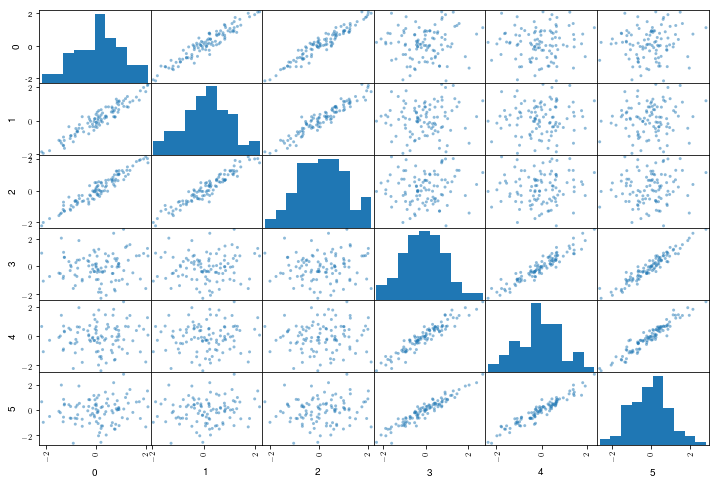

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 8))

### Lasso with lasso_path

In [6]:
eps = 5e-3  
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

### Lasso with sklearn Lasso

In [7]:
def lasso_with_sklearn(X, y, l1_reg=1):
    from sklearn.linear_model import Lasso
    n = X.shape[0]
    sklearn_lasso = Lasso(alpha=n*l1_reg, fit_intercept=False, normalize=False, max_iter=300, warm_start=False)
    sklearn_lasso.fit(X, y)
    return sklearn_lasso


### Lasso with Coordinate Shooting alg.

In [8]:
from numpy.linalg import inv
def init_w(X, y, alpha):
    di = alpha * np.identity(np.size(X,1))
    XtX = np.dot(X.T, X)
    w = np.dot(inv(XtX + di), np.dot(X.T, y))
    return w


def shooting_coords(X, y, alpha):
    w = init_w(X, y, alpha)
    maxIter = 100
    it = 0
    
    m,n = X.shape
    
    while it < maxIter:
        it = it + 1
        for j in range(0, n):
            
            a_j = 0
            for i in range(0, m):
                a_j = a_j + X[i, j] * X[i, j]
            a_j = 2 * a_j
            
            c_j = 0
            for i in range(0, m):
                c_j = c_j + X[i, j] * (y[i] - np.dot(w.T, X[i,:]) + w[j] * X[i, j])
            c_j = 2 * c_j
            
            if c_j < -alpha:
                w[j] = (c_j + alpha) / a_j
            elif c_j > alpha:
                w[j] = (c_j - alpha) / a_j
            else:
                w[j] = 0
    return w

### Ran  Lasso from sklearn and Lasso with Coordinate Shooting

In [9]:
#Lasso 
coefs_lass_sklearn = []
for alpha in alphas_lasso:
    coefs_lass_sklearn.append(lasso_with_sklearn(X, y, alpha).coef_)
coefs_lasso_sk = np.array(coefs_lass_sklearn).T

#coord shooting
coefs_lass_shoot = []
for alpha in range(0, 10):
    coefs_lass_shoot.append(shooting_coords(X, y, X.shape[0] * alpha))
coefs_lasso_sh = np.array(coefs_lass_shoot).T


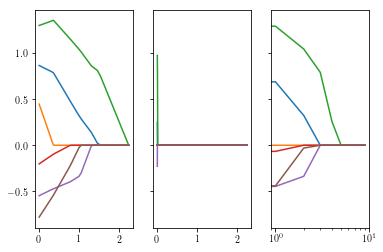

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(alphas_lasso, coefs_lasso[0])
ax1.plot(alphas_lasso, coefs_lasso[1])
ax1.plot(alphas_lasso, coefs_lasso[2])
ax1.plot(alphas_lasso, coefs_lasso[3])
ax1.plot(alphas_lasso, coefs_lasso[4])
ax1.plot(alphas_lasso, coefs_lasso[5])
ax2.plot(alphas_lasso, coefs_lasso_sk[0])
ax2.plot(alphas_lasso, coefs_lasso_sk[1])
ax2.plot(alphas_lasso, coefs_lasso_sk[2])
ax2.plot(alphas_lasso, coefs_lasso_sk[3])
ax2.plot(alphas_lasso, coefs_lasso_sk[4])
ax2.plot(alphas_lasso, coefs_lasso_sk[5])
ax3.plot(range(0, 10), coefs_lasso_sh[0])
ax3.plot(range(0, 10), coefs_lasso_sh[1])
ax3.plot(range(0, 10), coefs_lasso_sh[2])
ax3.plot(range(0, 10), coefs_lasso_sh[3])
ax3.plot(range(0, 10), coefs_lasso_sh[4])
ax3.plot(range(0, 10), coefs_lasso_sh[5])
plt.xscale('log')
plt.show()
